In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
N, D_in, H, D_out = 2, 100, 50, 1 # N: 데이터 갯수, D_in: 데이터(뇌세포) 갯수? H: 추가 뇌세포...? D_out: 출력치...???

In [34]:
x = np.random.randn(N, D_in) # 내가 만들어낸 인풋값
y = np.random.randn(N, D_out) # 내가 원하는 정답값

# x 의 데이터들을 통해 학습해서 y의 값이 나오게 만들어라! 라는 의미

print(x.shape)
print(y.shape)
print(x)
print('====')
print(y)

(2, 100)
(2, 1)
[[ 1.03219491  0.06905578  1.48365477 -1.52498406  1.07545644  0.84363062
   2.21631657  1.87161712  1.0704738   0.87252236  0.40310283 -1.87930058
  -0.43320996  1.67789879 -1.74041181  2.62565599 -0.17980071 -1.02963115
   0.70735424 -1.05939111 -0.67946881 -1.65863048  0.66560094 -1.46209877
  -0.78641722 -0.53605506 -0.10586187 -0.73960148  1.14259182  1.31269821
   0.43065453  1.37270652  0.78318929  1.0567404  -1.53841752 -0.03052623
  -0.61906429 -2.11491578  0.08111674  0.94651342 -0.58675016 -1.21517929
  -1.70252104  0.6897297  -1.38503648 -1.76005134 -1.55073165 -0.95384681
  -1.53211369  0.1210964   0.3232618  -0.25418288 -0.4814002   0.37113319
  -0.4842437  -0.59299984 -0.82926713 -0.65842329 -1.18672935  0.08904731
  -0.81537246 -0.42424106  1.6205403   0.91113782 -0.6692205  -1.88126369
   0.54217121  0.96044253 -1.61973059  1.30768506  0.73518705 -0.08639272
   0.86947799  0.43914148 -0.06431785 -1.51759759  0.08172832 -0.28638775
  -0.05639024 -0.89144

In [35]:
w1 = np.random.randn(D_in, H) # 뉴런을 5000개 만들었음
w2 = np.random.randn(H, D_out) # 만들어내 뉴런을 다발로 만듦

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [36]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):    # 500 번을 반복하면서 데이터값을 학습시키는 과정
    h = x.dot(w1)       # 미리 정해둔 결과값과 비교하면서 오차를 출력
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 6687.964683544287
1 6540.560574285054
2 6396.673132568133
3 6256.211436591055
4 6119.087167502736
5 5985.214524226533
6 5854.51014153616
7 5726.893011240376
8 5603.205769373221
9 5482.669918275005
10 5364.961353423325
11 5250.00843393079
12 5137.741508606847
13 5028.092853545922
14 4920.996611984336
15 4816.3887363301055
16 4714.2069322745265
17 4614.390604898697
18 4516.880806692261
19 4421.62018740563
20 4328.552945660592
21 4237.624782247676
22 4148.782855042143
23 4061.9757354733965
24 3977.1533664857498
25 3894.2670219313595
26 3813.26926733861
27 3734.1139220020978
28 3656.7560223425235
29 3581.1517864872517
30 3507.2585800244856
31 3435.0348828859687
32 3364.440257315283
33 3295.4353168805387
34 3227.9816964921292
35 3162.0420233879167
36 3097.579889049705
37 3034.559822016743
38 2972.9472615629384
39 2912.708532206404
40 2853.8108190209177
41 2796.2221437202807
42 2739.911341487777
43 2684.848038524088
44 2631.0026302880083
45 2578.3462604055494
46 2526.8508002238104
47 2476.

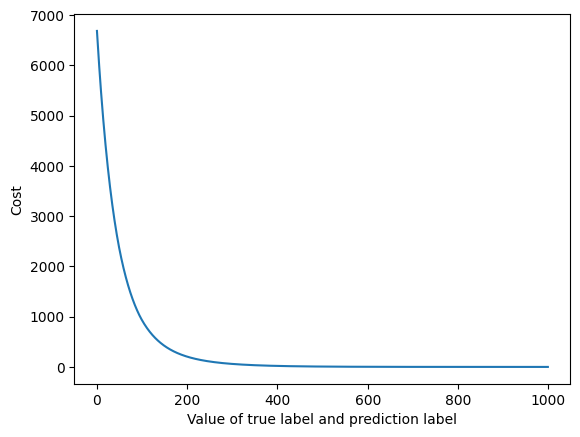

In [38]:
step_list = [i for i in range(len(loss_list))] # 한줄 for문
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and prediction label')
plt.show()